In [1]:
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
import os 
from pathlib import Path
import re
import PIL
import cv2
import seaborn as sns 
import copy
import importlib

import spectral_util
importlib.reload(spectral_util)
from spectral_util import *

import fluorescence_util
importlib.reload(fluorescence_util)
from fluorescence_util import *


In [2]:
# 'board.xlsx'
# 'board_noFlux.xlsx'
# 'flux_20240925_184835.xlsx'
# 'flux-onBoard.xlsx'
# 'lead_noFlux.xlsx'

# srcbase = Path("./data/EEM_F-7000_2025-04-11/")
print(Path.cwd())
srcbase = Path("./data/EEM_F-7000_2025-05-29/")
dstdir = Path("./dst/eem/filter")

srcdata = [
    {
        "path": fpath,
        "sample": fpath.stem.split("_")[0],  # 'ABS_20250411' → 'ABS'
        "label": None
    }
    for fpath in srcbase.glob("*.xlsx")
]
srcdata

c:\Users\sawamoto24\sawamoto24\修士研究\microplastic


[{'path': WindowsPath('data/EEM_F-7000_2025-05-29/ABS.xlsx'),
  'sample': 'ABS',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/HDPE.xlsx'),
  'sample': 'HDPE',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/LDPE.xlsx'),
  'sample': 'LDPE',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PC.xlsx'),
  'sample': 'PC',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PET_20250529_150210.xlsx'),
  'sample': 'PET',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PMMA.xlsx'),
  'sample': 'PMMA',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PP.xlsx'),
  'sample': 'PP',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PS.xlsx'),
  'sample': 'PS',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PVC.xlsx'),
  'sample': 'PVC',
  'label': None}]

EEM of "ABS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "HDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "LDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PET"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PMMA"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PP"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PVC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].


<Figure size 640x480 with 0 Axes>

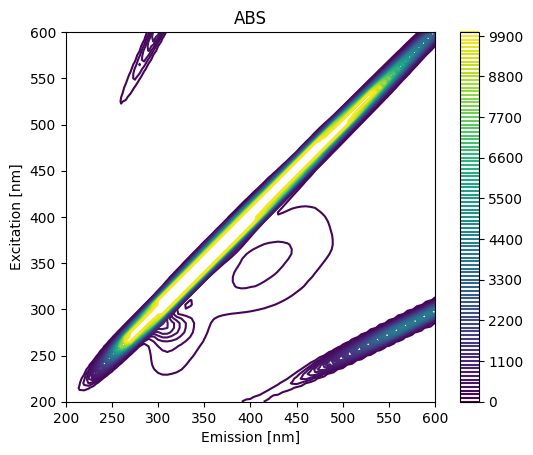

<Figure size 640x480 with 0 Axes>

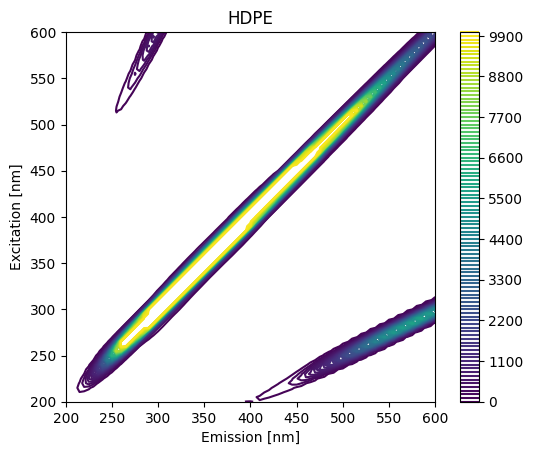

<Figure size 640x480 with 0 Axes>

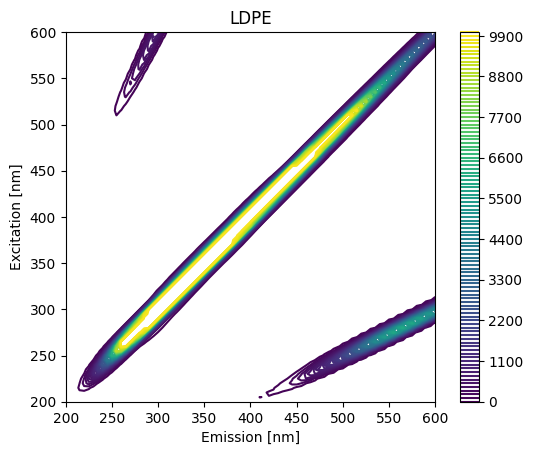

<Figure size 640x480 with 0 Axes>

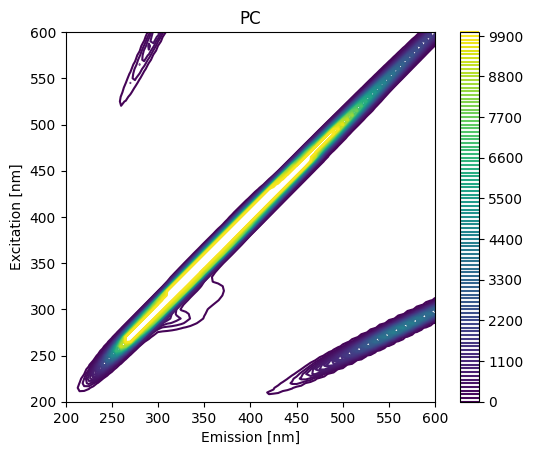

<Figure size 640x480 with 0 Axes>

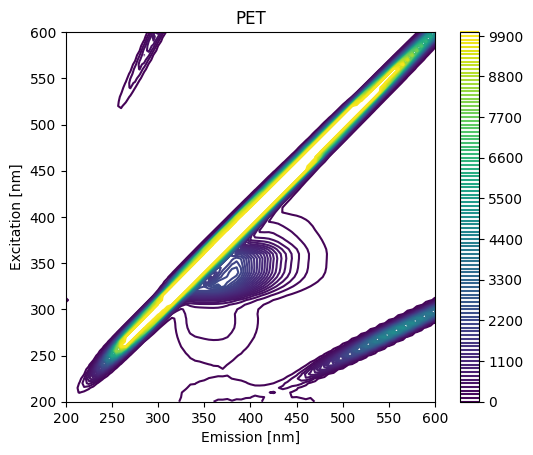

<Figure size 640x480 with 0 Axes>

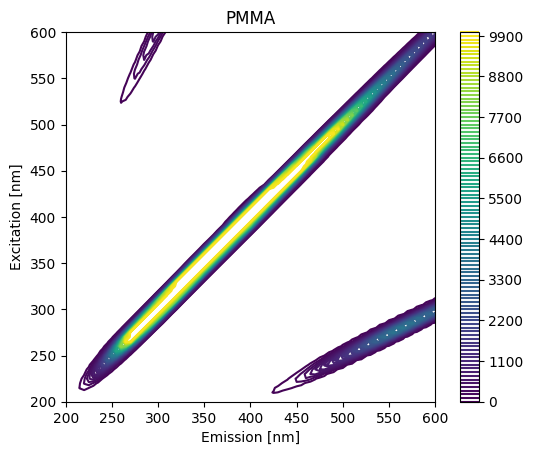

<Figure size 640x480 with 0 Axes>

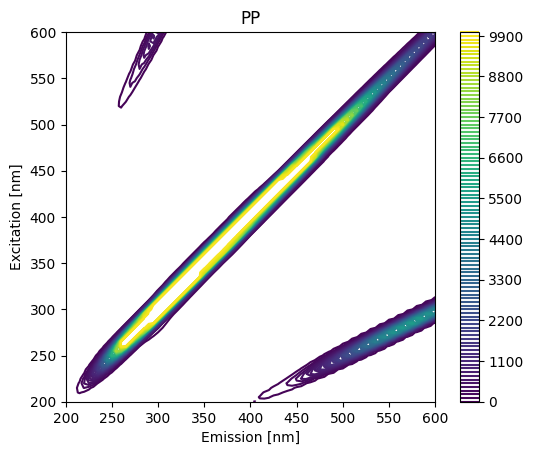

<Figure size 640x480 with 0 Axes>

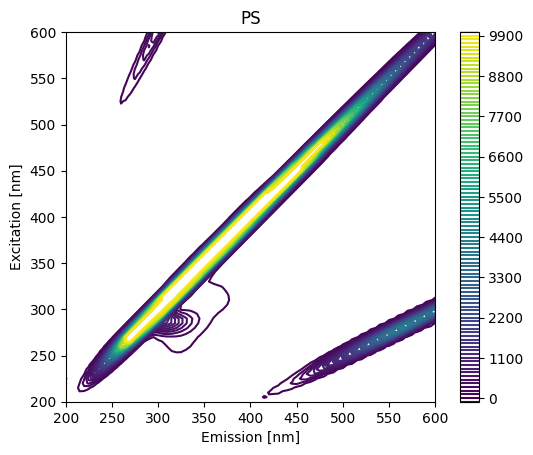

<Figure size 640x480 with 0 Axes>

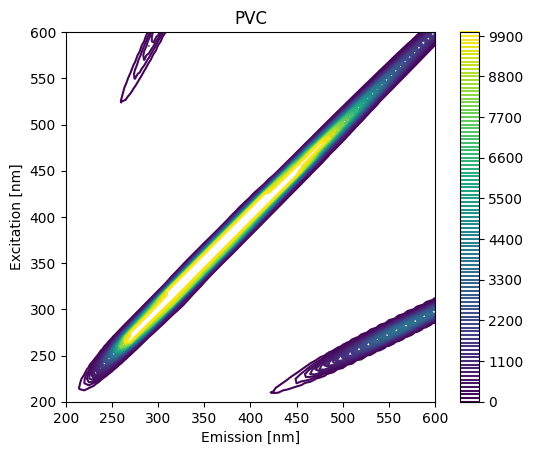

In [3]:
for data in srcdata:
    eem = fluorescence_util.EEMF7000(data.get('path'))
    print(eem)

    plt.figure()
    eem.plot_contour(level=100, show_sample_name=True)

In [4]:
em_bands = eem.em_bands
ex_bands = eem.ex_bands

EEM of "ABS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "HDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "LDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PET"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PMMA"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PP"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PVC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
(9, 71, 71)


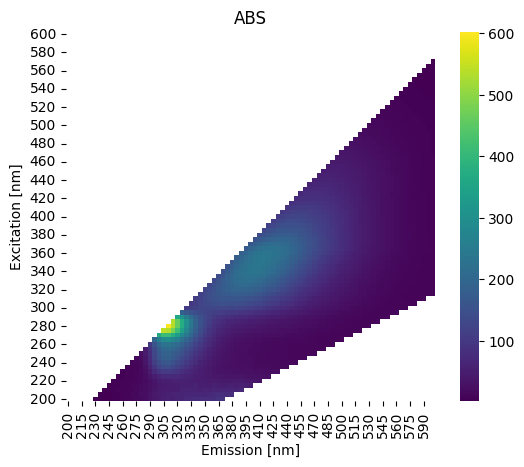

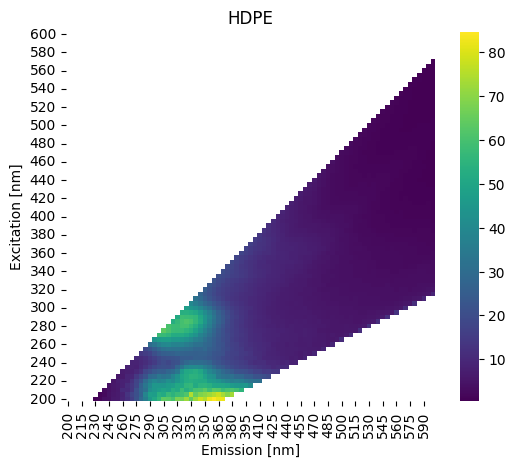

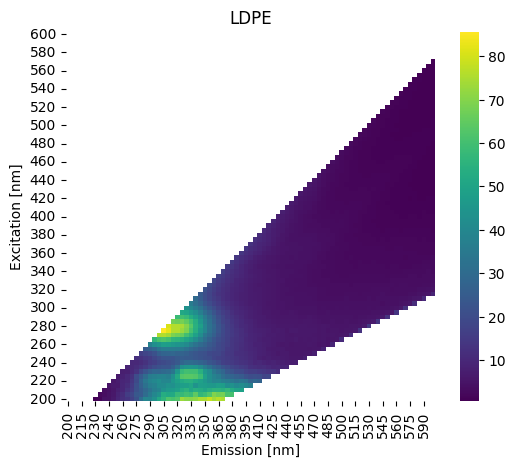

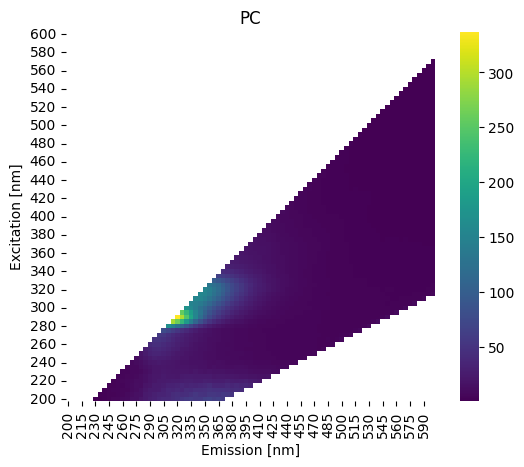

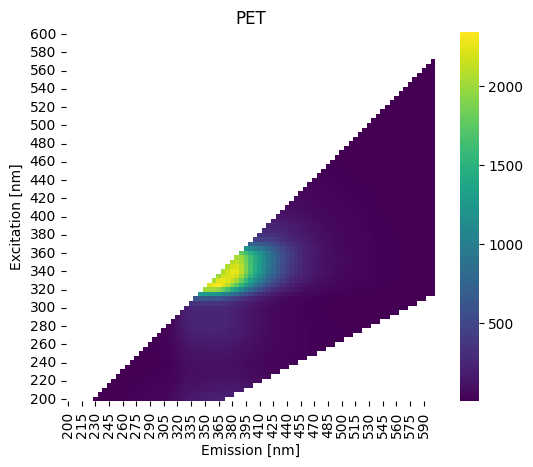

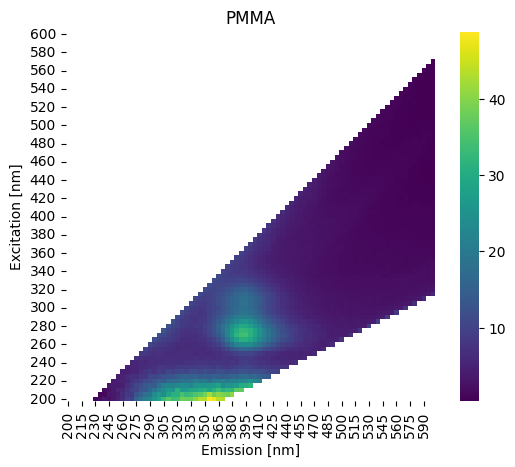

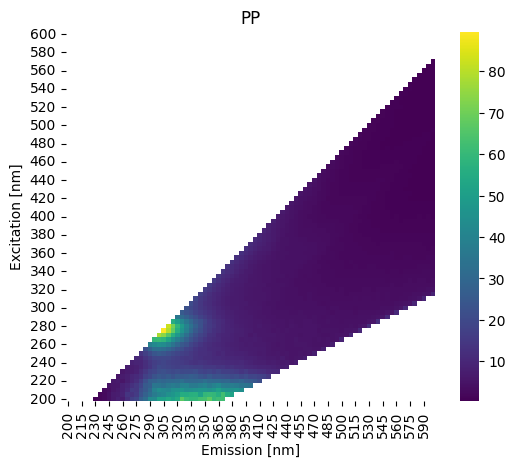

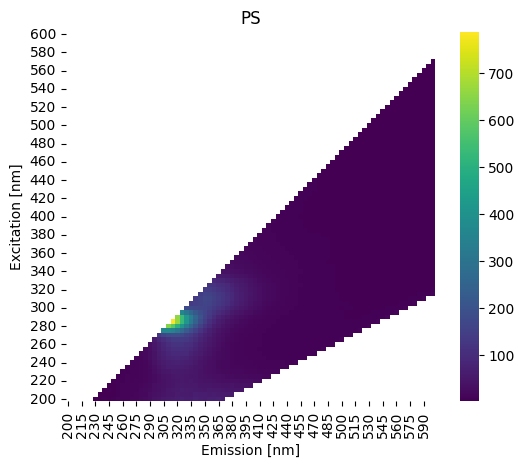

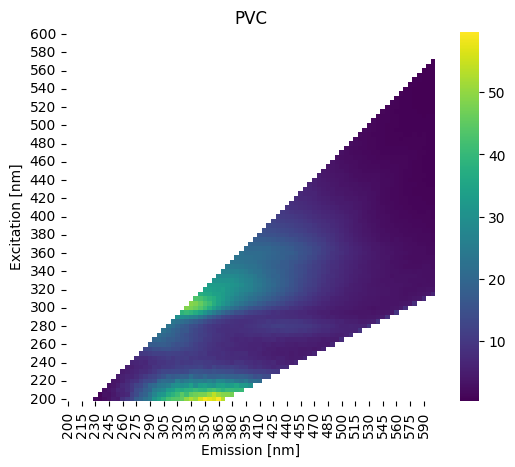

In [5]:
# for data in srcdata:
#     eem = fluorescence_util.EEMF7000(data.get('path'))
#     print(eem)

#     plt.figure()

#     # ① 散乱ピーク除去
#     eem.remove_self_reflection_and_scattering_from_eem(margin_steps=6,
#                                                        remove_first_order=True, 
#                                                        inplace=True)

#     # ② 追加で散乱領域全体を除去
#     eem.remove_scatter_regions(inplace=True)

#     eem.plot_heatmap()
#     plt.title(eem.sample)

sample_data = []
sample_name = []

for data in srcdata:

    eem = fluorescence_util.EEMF7000(data.get('path'))
    print(eem)

    plt.figure()

    # ①散乱ピーク除去
    eem.remove_self_reflection_and_scattering_from_eem(margin_steps=6,
                                                       remove_first_order=True,
                                                        inplace=True)

    # ② 追加で散乱領域全体を除去
    eem.remove_scatter_regions(inplace=True)

    
    # 250nm以上のインデックスを取得
    ex_mask = ex_bands >= 250
    em_mask = em_bands >= 250

    eem.plot_heatmap()
    plt.title(eem.sample)


    eem_matrix = eem.mat  # numpy配列を取り出す

    eem_matrix = np.nan_to_num(eem.mat, nan=0.0)
    eem_matrix_trimmed = eem_matrix[np.ix_(ex_mask, em_mask)]

    sample_data.append(eem_matrix_trimmed)
    sample_name.append(eem.sample)


# numpy配列に保存
eem_array = np.array(sample_data)
print(eem_array.shape)

## 波長域の調整

In [6]:
ex_mask = np.array(ex_bands) >= 250
em_mask = np.array(em_bands) >= 250

# trim
ex_bands = np.array(ex_bands)[ex_mask]
em_bands = np.array(em_bands)[em_mask]

print("Excitation bands ≥ 250nm:", ex_bands)
print("Emission bands ≥ 250nm:", em_bands)


Excitation bands ≥ 250nm: [250. 255. 260. 265. 270. 275. 280. 285. 290. 295. 300. 305. 310. 315.
 320. 325. 330. 335. 340. 345. 350. 355. 360. 365. 370. 375. 380. 385.
 390. 395. 400. 405. 410. 415. 420. 425. 430. 435. 440. 445. 450. 455.
 460. 465. 470. 475. 480. 485. 490. 495. 500. 505. 510. 515. 520. 525.
 530. 535. 540. 545. 550. 555. 560. 565. 570. 575. 580. 585. 590. 595.
 600.]
Emission bands ≥ 250nm: [250. 255. 260. 265. 270. 275. 280. 285. 290. 295. 300. 305. 310. 315.
 320. 325. 330. 335. 340. 345. 350. 355. 360. 365. 370. 375. 380. 385.
 390. 395. 400. 405. 410. 415. 420. 425. 430. 435. 440. 445. 450. 455.
 460. 465. 470. 475. 480. 485. 490. 495. 500. 505. 510. 515. 520. 525.
 530. 535. 540. 545. 550. 555. 560. 565. 570. 575. 580. 585. 590. 595.
 600.]


In [7]:
import numpy as np

# --- 波長条件に合うインデックスを取得 ---
ex_mask = np.array(ex_bands) >= 250
em_mask = np.array(em_bands) >= 250

# --- 波長帯をトリミング ---
ex_trimmed = np.array(ex_bands)[ex_mask]  # shape = (n_ex_trimmed,)
em_trimmed = np.array(em_bands)[em_mask]  # shape = (n_em_trimmed,)

trimmed_eems = eem_array[:, ex_mask, :][:, :, em_mask]  # shape = (num_MP, n_ex_trimmed, n_em_trimmed)

# --- 散乱領域マスクを生成 ---
ex_grid, em_grid = np.meshgrid(ex_trimmed, em_trimmed, indexing='ij')
valid_mask = (em_grid >= ex_grid) & (em_grid <= 2 * ex_grid)  # shape = (n_ex_trimmed, n_em_trimmed)

# --- 散乱領域を0にする ---
for i in range(trimmed_eems.shape[0]):  # 各MPサンプルに対して
    trimmed_eems[i][~valid_mask] = 0


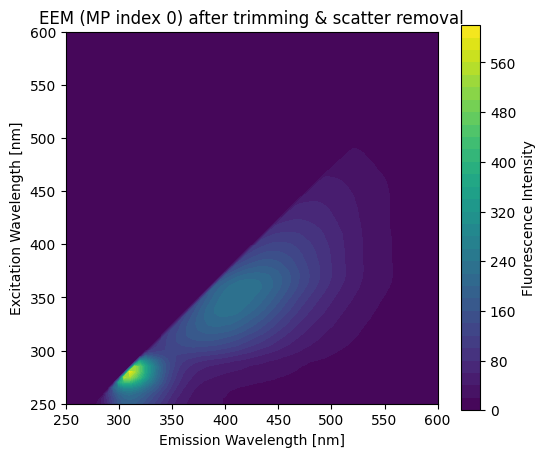

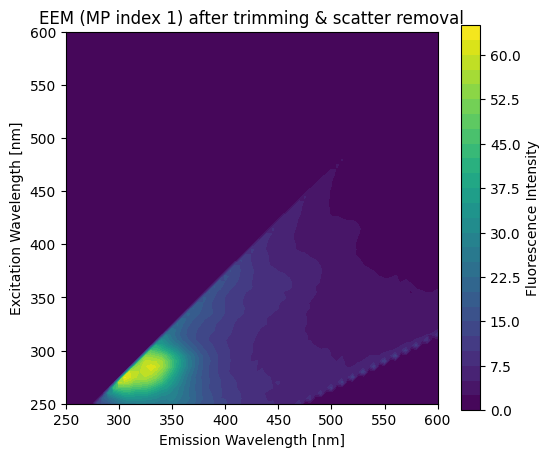

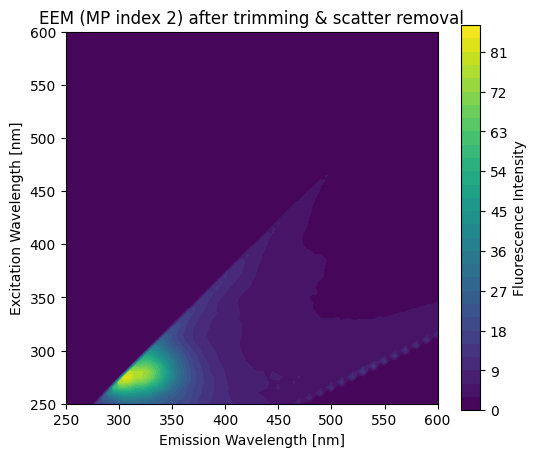

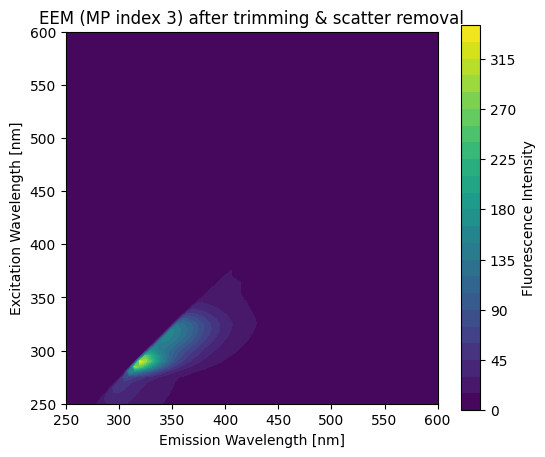

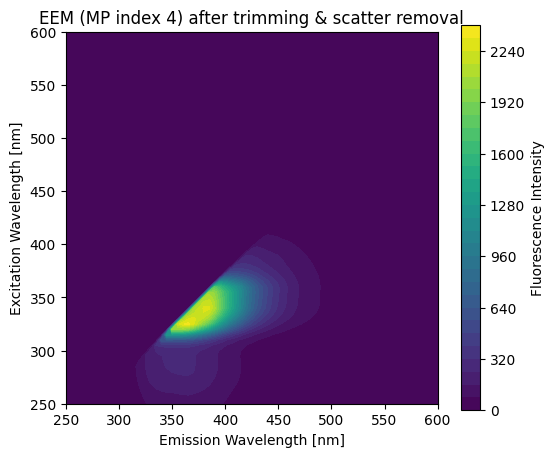

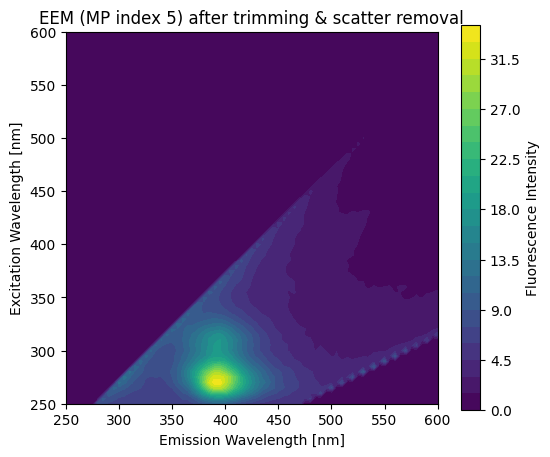

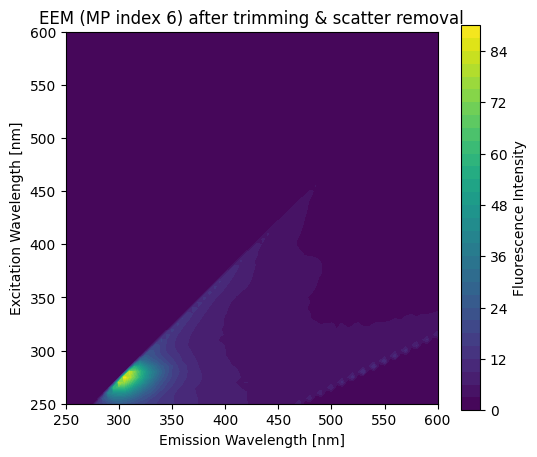

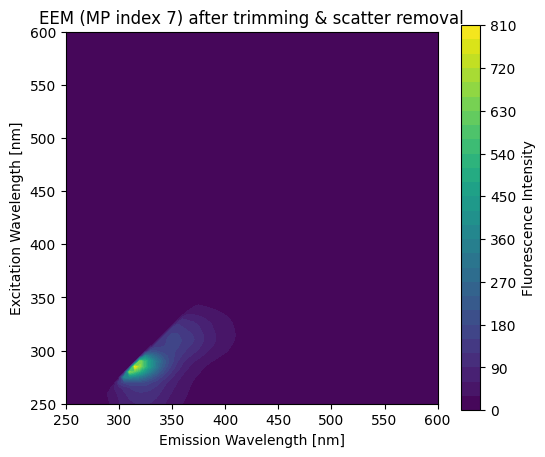

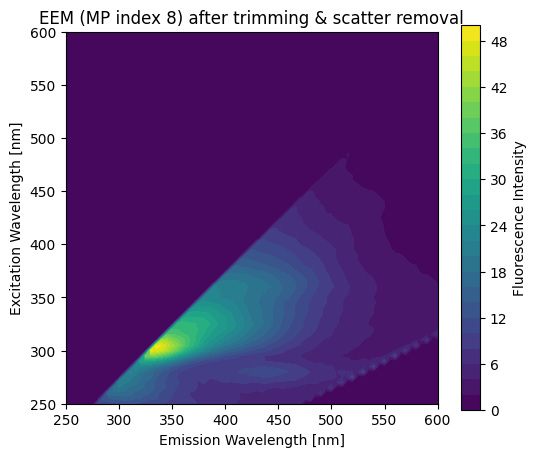

In [8]:
for i in range(trimmed_eems.shape[0]):  
    plt.figure(figsize=(6, 5))
    plt.contourf(em_trimmed, ex_trimmed, trimmed_eems[i], levels=30, cmap='viridis')
    plt.xlabel("Emission Wavelength [nm]")
    plt.ylabel("Excitation Wavelength [nm]")
    plt.title(f"EEM (MP index {i}) after trimming & scatter removal")
    plt.colorbar(label="Fluorescence Intensity")
    plt.axis("square")
    plt.show()

In [9]:
eem_array.shape

(9, 71, 71)

---

## PARAFAC，Core Consistency，Split half

In [10]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac
from scipy.stats import pearsonr
from corcondia import corcondia_3d
import matplotlib.pyplot as plt

tl.set_backend('numpy')

# --- PARAFAC結果をすべて保存する関数 ---
def compute_parafac_results(eem_tensor, max_components):
    results = []
    for r in range(1, max_components + 1):
        factors = parafac(eem_tensor, rank=r, init='random', tol=1e-6, n_iter_max=200)
        results.append(factors)
    return results

# --- Core Consistency Diagnostic (CORCONDIA)
def compute_core_consistency_corcondia(tensor, max_components=7):
    cc_list = []
    for r in range(1, max_components + 1):
        cc = corcondia_3d(tensor, k=r)
        cc_list.append(cc)
    return cc_list

# --- Split-Half 類似度の一括計算
def compute_split_half_similarities(tensor, max_components):
    sim_list = []
    for r in range(1, max_components + 1):
        all_idx = np.arange(tensor.shape[2])
        np.random.shuffle(all_idx)
        half1 = tensor[:, :, all_idx[:tensor.shape[2] // 2]]
        half2 = tensor[:, :, all_idx[tensor.shape[2] // 2:]]

        f1 = parafac(half1, rank=r, init='random', tol=1e-6, n_iter_max=200)
        f2 = parafac(half2, rank=r, init='random', tol=1e-6, n_iter_max=200)

        ex1, em1, _ = f1.factors
        ex2, em2, _ = f2.factors

        sim_total = 0
        for i in range(r):
            r_ex, _ = pearsonr(ex1[:, i], ex2[:, i])
            r_em, _ = pearsonr(em1[:, i], em2[:, i])
            sim_total += (r_ex + r_em) / 2
        sim_list.append(sim_total / r)
    return sim_list

# === 🚩 ここから MPごとの差をPARAFACで見る ===

# 例: MPごとのEEM配列（形状: num_MP × n_ex × n_em）
# 例: eem_array = np.load('your_eem_file.npz') → shape: (9, 51, 61)

rank = 9

tensor_mpwise = np.transpose(eem_array, (1, 2, 0))  # shape: (n_ex, n_em, n_MP)

cc_mp = compute_core_consistency_corcondia(tensor_mpwise, max_components=rank)
sh_mp = compute_split_half_similarities(tensor_mpwise, max_components=rank)
factors_mp = compute_parafac_results(tensor_mpwise, max_components=rank)




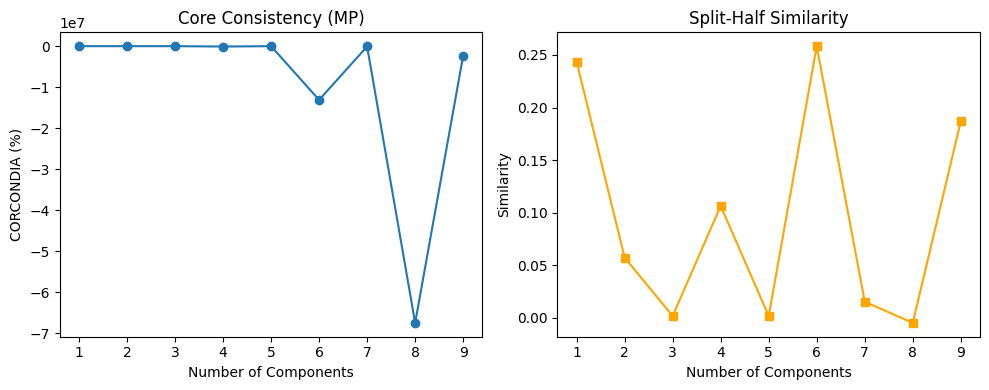

In [11]:
# --- 結果をプロット
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, rank + 1), cc_mp, marker='o')
plt.title("Core Consistency (MP)")
plt.xlabel("Number of Components")
plt.ylabel("CORCONDIA (%)")

plt.subplot(1, 2, 2)
plt.plot(range(1, rank + 1), sh_mp, marker='s', color='orange')
plt.title("Split-Half Similarity")
plt.xlabel("Number of Components")
plt.ylabel("Similarity")

plt.tight_layout()
plt.show()

## コンポーネントの可視化

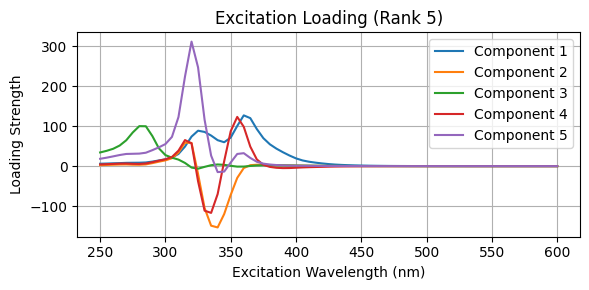

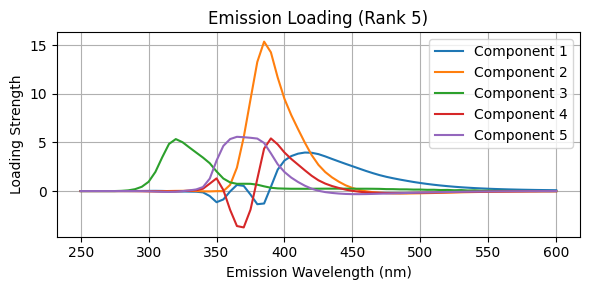

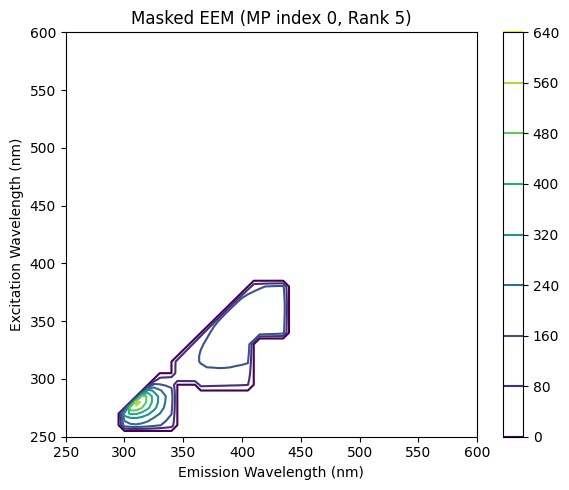

In [12]:
# --- 必要な情報を前提にしてください ---
# ・factors_mp：PARAFACの結果（compute_parafac_results の戻り値）
# ・eem_array：元のEEMデータ（shape: [n_MP, n_ex, n_em]）
# ・ex_bands, em_bands：波長軸（1D np.array）

# === 任意のrankを指定 ===5
rank =  5 # ★ここを変更すればOK
sample_index = 0  # 表示するMP（0〜8など）

# === 対応するローディングを取り出し ===
factors_rank = factors_mp[rank - 1]  # rank=1 → index=0
excitation_loading, emission_loading, _ = factors_rank.factors

eem = eem_array[sample_index]  # 例：1つ目のMPのEEM

# === 励起ローディングの表示 ===
plt.figure(figsize=(6, 3))
for i in range(rank):
    plt.plot(ex_bands, excitation_loading[:, i], label=f"Component {i+1}")
plt.title(f"Excitation Loading (Rank {rank})")
plt.xlabel("Excitation Wavelength (nm)")
plt.ylabel("Loading Strength")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 放射ローディングの表示 ===
plt.figure(figsize=(6, 3))
for i in range(rank):
    plt.plot(em_bands, emission_loading[:, i], label=f"Component {i+1}")
plt.title(f"Emission Loading (Rank {rank})")
plt.xlabel("Emission Wavelength (nm)")
plt.ylabel("Loading Strength")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === バンドパス領域付きのEEMプロット ===
masked_eem = np.zeros_like(eem)
band_width = 20  # ±nmの幅   ###################### 
 
for i in range(rank):
    ex_peak = ex_bands[np.argmax(excitation_loading[:, i])]
    em_peak = em_bands[np.argmax(emission_loading[:, i])]

    ex_mask = (ex_bands >= ex_peak - band_width) & (ex_bands <= ex_peak + band_width)
    em_mask = (em_bands >= em_peak - band_width) & (em_bands <= em_peak + band_width)

    masked_eem[np.ix_(ex_mask, em_mask)] = eem[np.ix_(ex_mask, em_mask)]

plt.figure(figsize=(6, 5))
cp = plt.contour(em_bands, ex_bands, masked_eem, cmap='viridis')
plt.title(f"Masked EEM (MP index {sample_index}, Rank {rank})")
plt.xlabel("Emission Wavelength (nm)")
plt.ylabel("Excitation Wavelength (nm)")
plt.colorbar(cp)
plt.tight_layout()
plt.show()


---

# 複数のMP EEMをランダムな重みで混合

In [13]:
import numpy as np

def generate_synthetic_eem(eem_array, n_samples=1000, noise_level=0.01, seed=42):
    """
    複数のMP EEMをランダムな重みで混合して、合成EEMを生成する

    Parameters:
        eem_array: np.ndarray (9, 71, 71) → 9種類のMPのEEM
        n_samples: int → 合成するEEMの数（例：1000）
        noise_level: float → 混合後に加えるノイズの強さ（最大値に対する割合）
        seed: int → 再現性用乱数シード

    Returns:
        synthetic_eems: np.ndarray (n_samples, 71, 71)
    """
    np.random.seed(seed)
    n_components = eem_array.shape[0]
    ex_len, em_len = eem_array.shape[1], eem_array.shape[2]

    synthetic_eems = np.zeros((n_samples, ex_len, em_len))

    for i in range(n_samples):
        # ランダムな重み（正規化して合計1にする）
        weights = np.random.rand(n_components)
        weights /= weights.sum()

        # 成分ごとに重み付けして合成
        combined = sum(weights[j] * eem_array[j] for j in range(n_components))

        # ノイズ追加（全体のmaxに対する割合）
        noise = np.random.normal(loc=0, scale=noise_level * np.max(combined), size=combined.shape)
        noisy_combined = np.clip(combined + noise, 0, None)

        synthetic_eems[i] = noisy_combined

    return synthetic_eems


synthetic_eems = generate_synthetic_eem(eem_array, n_samples=1000, noise_level=0.01)
print(synthetic_eems.shape)  # → (1000, 71, 71)



(1000, 71, 71)


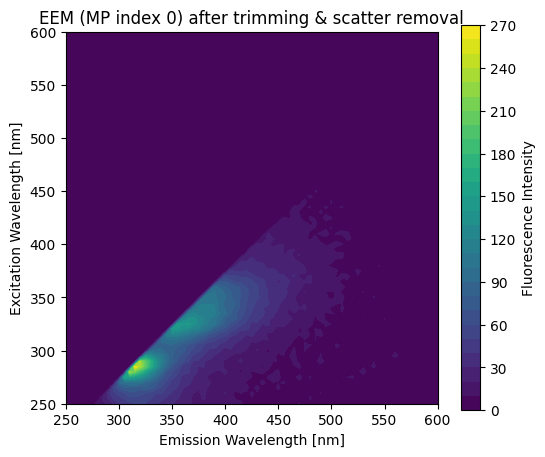

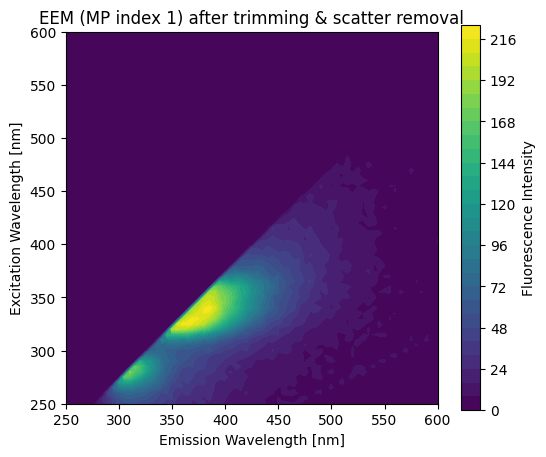

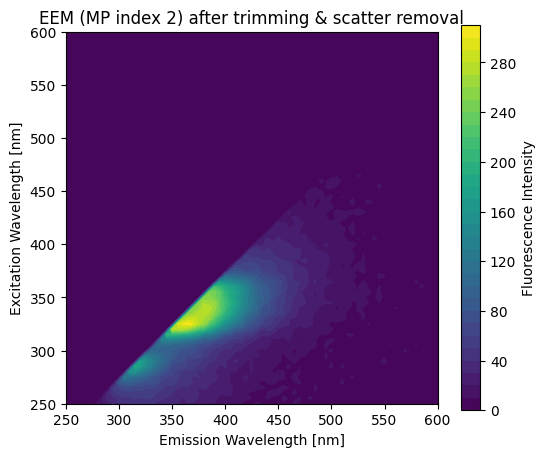

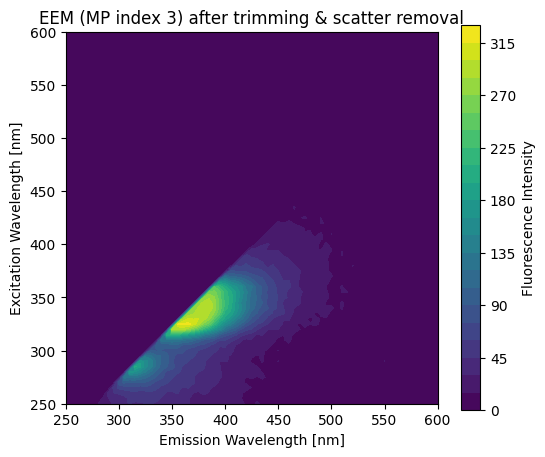

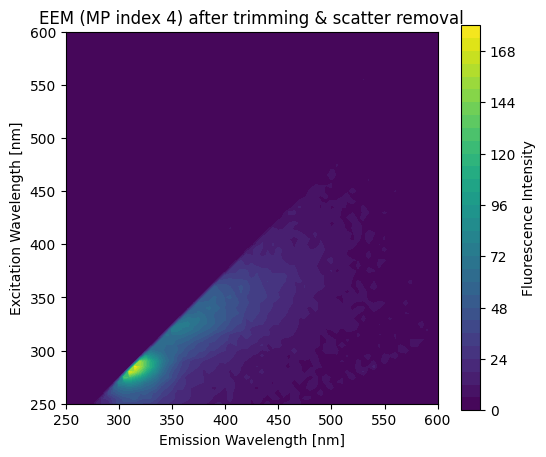

In [14]:
for i in range(5):  
    plt.figure(figsize=(6, 5))
    plt.contourf(em_trimmed, ex_trimmed, synthetic_eems[i], levels=30, cmap='viridis')
    plt.xlabel("Emission Wavelength [nm]")
    plt.ylabel("Excitation Wavelength [nm]")
    plt.title(f"EEM (MP index {i}) after trimming & scatter removal")
    plt.colorbar(label="Fluorescence Intensity")
    plt.axis("square")
    plt.show()

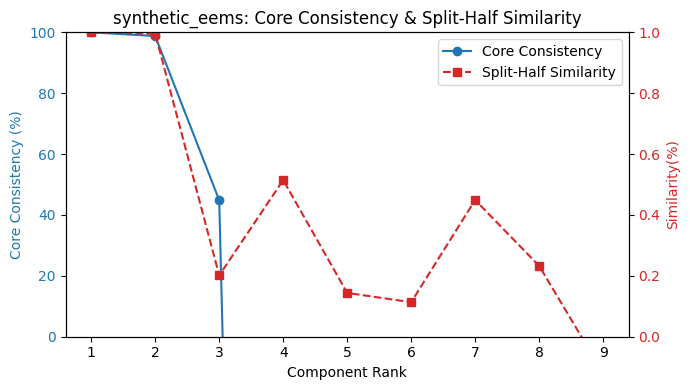

In [15]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac
from scipy.stats import pearsonr
from corcondia import corcondia_3d
import matplotlib.pyplot as plt

tl.set_backend('numpy')

# --- PARAFAC結果をすべて保存する関数 ---
def compute_parafac_results(eem_tensor, max_components):
    results = []
    for r in range(1, max_components + 1):
        factors = parafac(eem_tensor, rank=r, init='random', tol=1e-6, n_iter_max=200)
        results.append(factors)
    return results

# --- Core Consistency Diagnostic (CORCONDIA)
def compute_core_consistency_corcondia(tensor, max_components=7):
    cc_list = []
    for r in range(1, max_components + 1):
        cc = corcondia_3d(tensor, k=r)
        cc_list.append(cc)
    return cc_list

# --- Split-Half 類似度の一括計算
def compute_split_half_similarities(tensor, max_components):
    sim_list = []
    for r in range(1, max_components + 1):
        all_idx = np.arange(tensor.shape[2])
        np.random.shuffle(all_idx)
        half1 = tensor[:, :, all_idx[:tensor.shape[2] // 2]]
        half2 = tensor[:, :, all_idx[tensor.shape[2] // 2:]]

        f1 = parafac(half1, rank=r, init='random', tol=1e-6, n_iter_max=200)
        f2 = parafac(half2, rank=r, init='random', tol=1e-6, n_iter_max=200)

        ex1, em1, _ = f1.factors
        ex2, em2, _ = f2.factors

        sim_total = 0
        for i in range(r):
            r_ex, _ = pearsonr(ex1[:, i], ex2[:, i])
            r_em, _ = pearsonr(em1[:, i], em2[:, i])
            sim_total += (r_ex + r_em) / 2
        sim_list.append(sim_total / r)
    return sim_list

# === 🚩 ここから MPごとの差をPARAFACで見る ===

# 例: MPごとのEEM配列（形状: num_MP × n_ex × n_em）
# 例: eem_array = np.load('your_eem_file.npz') → shape: (9, 51, 61)


rank = 9

# for rank in range(1, 10):


tensor_mpwise = np.transpose(synthetic_eems, (1, 2, 0))  # shape: (n_ex, n_em, n_MP)

cc_mp = compute_core_consistency_corcondia(tensor_mpwise, max_components=rank)
sh_mp = compute_split_half_similarities(tensor_mpwise, max_components=rank)
factors_mp = compute_parafac_results(tensor_mpwise, max_components=rank)


ranks = list(range(1, 1 + len(cc_mp)))

fig, ax1 = plt.subplots(figsize=(7, 4))
ax2 = ax1.twinx()

ax1.plot(ranks, cc_mp, 'o-', color='tab:blue', label='Core Consistency')
ax2.plot(ranks, sh_mp, 's--', color='tab:red', label='Split-Half Similarity')

ax1.set_xlabel("Component Rank")
ax1.set_ylabel("Core Consistency (%)", color='tab:blue')
ax1.set_ylim(0, 100)
ax2.set_ylabel("Similarity(%)", color='tab:red')
ax2.set_ylim(0, 1.0)

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax1.set_title("synthetic_eems: Core Consistency & Split-Half Similarity")

# 凡例の設定
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()




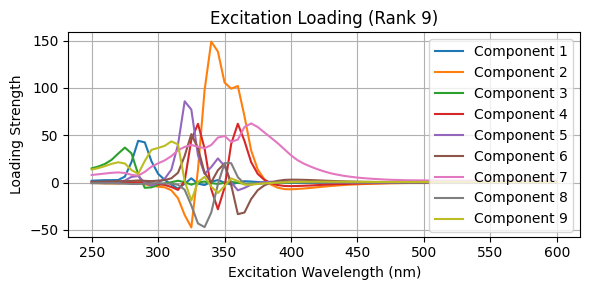

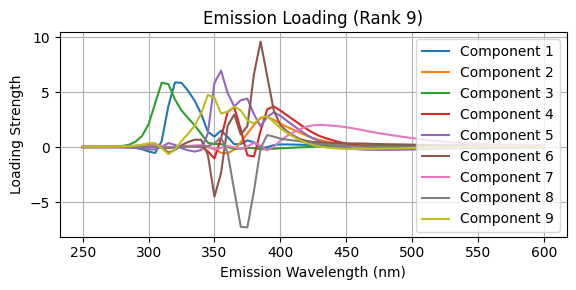

Loading_1 peak ex_band: 285.0, em_band: 320.0
Loading_2 peak ex_band: 340.0, em_band: 390.0
Loading_3 peak ex_band: 275.0, em_band: 310.0
Loading_4 peak ex_band: 360.0, em_band: 395.0
Loading_5 peak ex_band: 320.0, em_band: 355.0
Loading_6 peak ex_band: 325.0, em_band: 385.0
Loading_7 peak ex_band: 370.0, em_band: 430.0
Loading_8 peak ex_band: 355.0, em_band: 390.0
Loading_9 peak ex_band: 310.0, em_band: 345.0


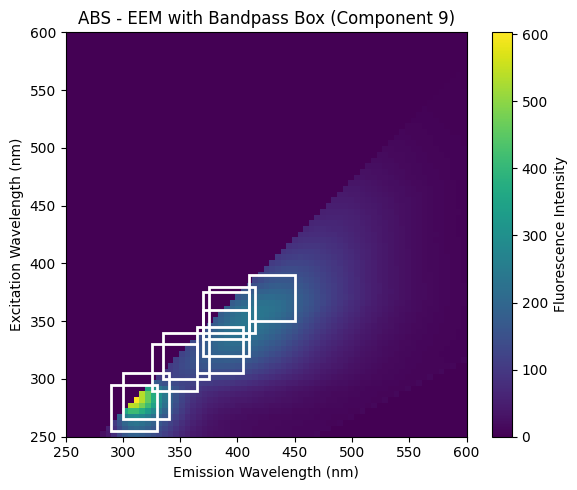

Loading_1 peak ex_band: 285.0, em_band: 320.0
Loading_2 peak ex_band: 340.0, em_band: 390.0
Loading_3 peak ex_band: 275.0, em_band: 310.0
Loading_4 peak ex_band: 360.0, em_band: 395.0
Loading_5 peak ex_band: 320.0, em_band: 355.0
Loading_6 peak ex_band: 325.0, em_band: 385.0
Loading_7 peak ex_band: 370.0, em_band: 430.0
Loading_8 peak ex_band: 355.0, em_band: 390.0
Loading_9 peak ex_band: 310.0, em_band: 345.0


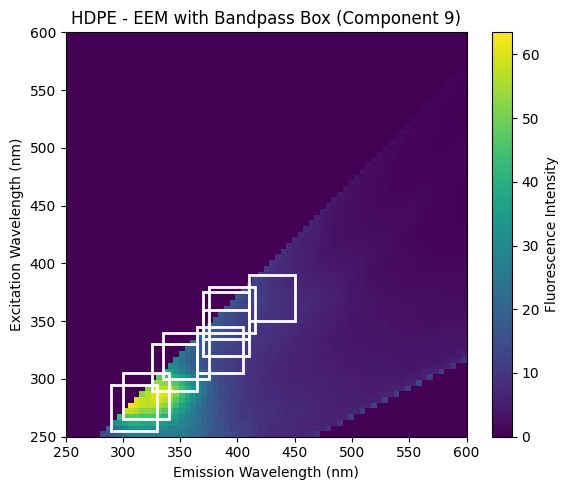

Loading_1 peak ex_band: 285.0, em_band: 320.0
Loading_2 peak ex_band: 340.0, em_band: 390.0
Loading_3 peak ex_band: 275.0, em_band: 310.0
Loading_4 peak ex_band: 360.0, em_band: 395.0
Loading_5 peak ex_band: 320.0, em_band: 355.0
Loading_6 peak ex_band: 325.0, em_band: 385.0
Loading_7 peak ex_band: 370.0, em_band: 430.0
Loading_8 peak ex_band: 355.0, em_band: 390.0
Loading_9 peak ex_band: 310.0, em_band: 345.0


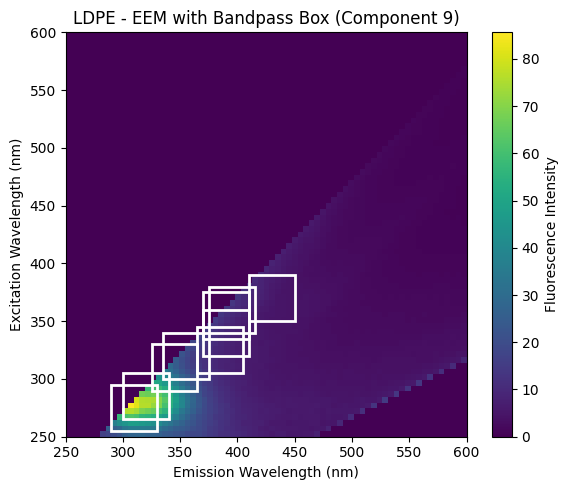

Loading_1 peak ex_band: 285.0, em_band: 320.0
Loading_2 peak ex_band: 340.0, em_band: 390.0
Loading_3 peak ex_band: 275.0, em_band: 310.0
Loading_4 peak ex_band: 360.0, em_band: 395.0
Loading_5 peak ex_band: 320.0, em_band: 355.0
Loading_6 peak ex_band: 325.0, em_band: 385.0
Loading_7 peak ex_band: 370.0, em_band: 430.0
Loading_8 peak ex_band: 355.0, em_band: 390.0
Loading_9 peak ex_band: 310.0, em_band: 345.0


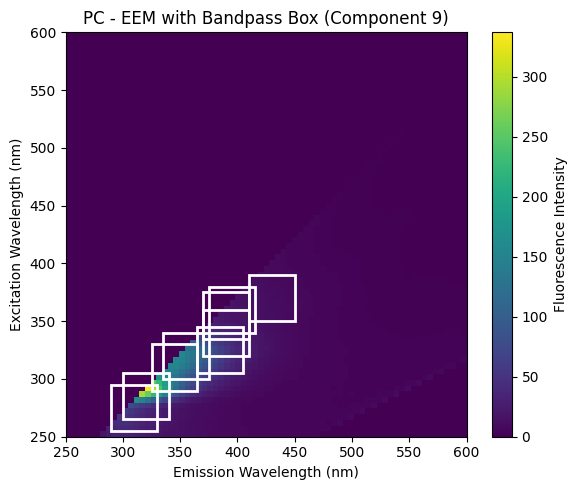

Loading_1 peak ex_band: 285.0, em_band: 320.0
Loading_2 peak ex_band: 340.0, em_band: 390.0
Loading_3 peak ex_band: 275.0, em_band: 310.0
Loading_4 peak ex_band: 360.0, em_band: 395.0
Loading_5 peak ex_band: 320.0, em_band: 355.0
Loading_6 peak ex_band: 325.0, em_band: 385.0
Loading_7 peak ex_band: 370.0, em_band: 430.0
Loading_8 peak ex_band: 355.0, em_band: 390.0
Loading_9 peak ex_band: 310.0, em_band: 345.0


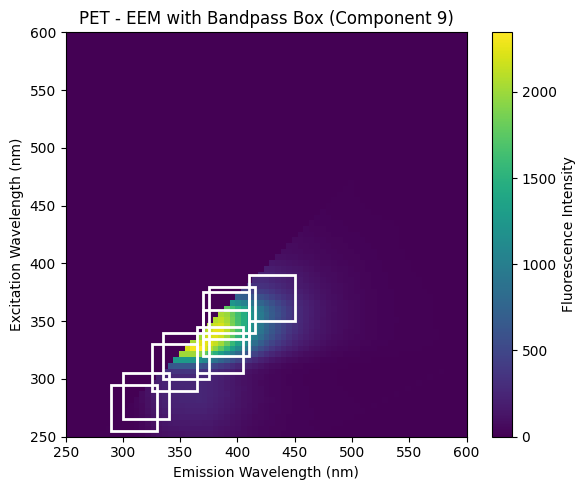

Loading_1 peak ex_band: 285.0, em_band: 320.0
Loading_2 peak ex_band: 340.0, em_band: 390.0
Loading_3 peak ex_band: 275.0, em_band: 310.0
Loading_4 peak ex_band: 360.0, em_band: 395.0
Loading_5 peak ex_band: 320.0, em_band: 355.0
Loading_6 peak ex_band: 325.0, em_band: 385.0
Loading_7 peak ex_band: 370.0, em_band: 430.0
Loading_8 peak ex_band: 355.0, em_band: 390.0
Loading_9 peak ex_band: 310.0, em_band: 345.0


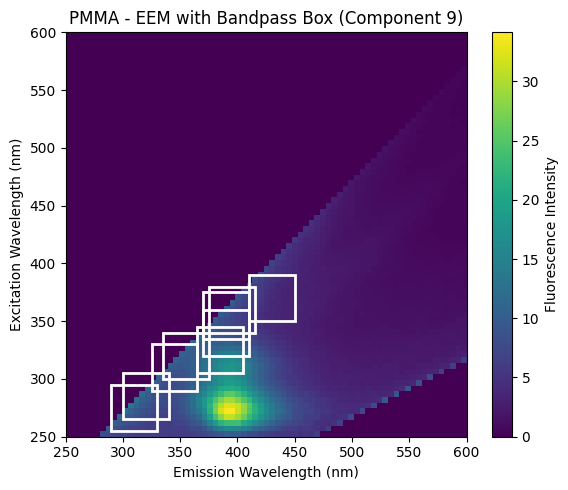

Loading_1 peak ex_band: 285.0, em_band: 320.0
Loading_2 peak ex_band: 340.0, em_band: 390.0
Loading_3 peak ex_band: 275.0, em_band: 310.0
Loading_4 peak ex_band: 360.0, em_band: 395.0
Loading_5 peak ex_band: 320.0, em_band: 355.0
Loading_6 peak ex_band: 325.0, em_band: 385.0
Loading_7 peak ex_band: 370.0, em_band: 430.0
Loading_8 peak ex_band: 355.0, em_band: 390.0
Loading_9 peak ex_band: 310.0, em_band: 345.0


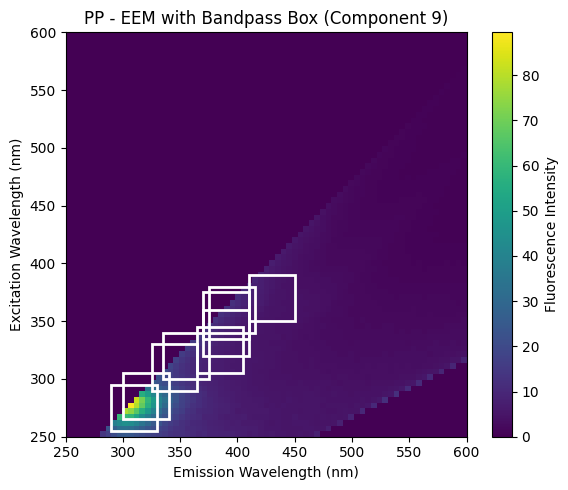

Loading_1 peak ex_band: 285.0, em_band: 320.0
Loading_2 peak ex_band: 340.0, em_band: 390.0
Loading_3 peak ex_band: 275.0, em_band: 310.0
Loading_4 peak ex_band: 360.0, em_band: 395.0
Loading_5 peak ex_band: 320.0, em_band: 355.0
Loading_6 peak ex_band: 325.0, em_band: 385.0
Loading_7 peak ex_band: 370.0, em_band: 430.0
Loading_8 peak ex_band: 355.0, em_band: 390.0
Loading_9 peak ex_band: 310.0, em_band: 345.0


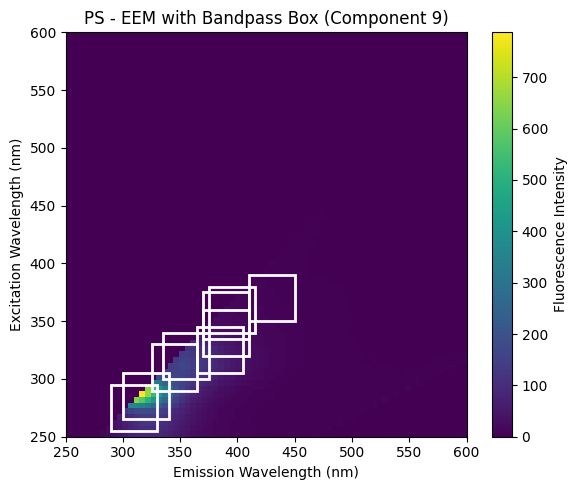

Loading_1 peak ex_band: 285.0, em_band: 320.0
Loading_2 peak ex_band: 340.0, em_band: 390.0
Loading_3 peak ex_band: 275.0, em_band: 310.0
Loading_4 peak ex_band: 360.0, em_band: 395.0
Loading_5 peak ex_band: 320.0, em_band: 355.0
Loading_6 peak ex_band: 325.0, em_band: 385.0
Loading_7 peak ex_band: 370.0, em_band: 430.0
Loading_8 peak ex_band: 355.0, em_band: 390.0
Loading_9 peak ex_band: 310.0, em_band: 345.0


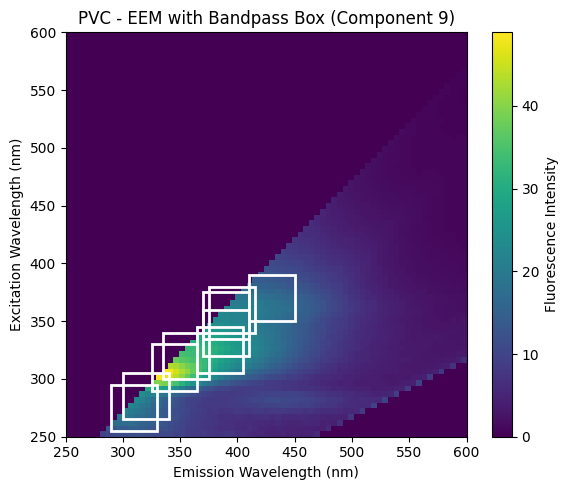

In [22]:
import matplotlib.patches as patches


# sample_index = 0  # 表示するMP（0〜8など）
rank = 9

# === 対応するローディングを取り出し ===
factors_rank = factors_mp[rank - 1]  # rank=1 → index=0
excitation_loading, emission_loading, _ = factors_rank.factors


# === 励起ローディングの表示 ===
plt.figure(figsize=(6, 3))
for i in range(rank):
    plt.plot(ex_bands, excitation_loading[:, i], label=f"Component {i+1}")
plt.title(f"Excitation Loading (Rank {rank})")
plt.xlabel("Excitation Wavelength (nm)")
plt.ylabel("Loading Strength")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 放射ローディングの表示 ===
plt.figure(figsize=(6, 3))
for i in range(rank):
    plt.plot(em_bands, emission_loading[:, i], label=f"Component {i+1}")
plt.title(f"Emission Loading (Rank {rank})")
plt.xlabel("Emission Wavelength (nm)")
plt.ylabel("Loading Strength")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


for sample_index in range(len(sample_name)):

    eem = eem_array[sample_index]  # 例：1つ目のMPのEEM

    # EEMをプロット
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(eem, origin='lower',
                    extent=[em_bands[0], em_bands[-1],
                            ex_bands[0], ex_bands[-1]],
                    aspect='auto', cmap='viridis')

    for i in range(rank):
        # ピーク波長をローディングから抽出
        exc_idx = np.argmax(excitation_loading[:, i])
        em_idx = np.argmax(emission_loading[:, i])
        exc_peak = ex_bands[exc_idx]
        em_peak = em_bands[em_idx]

        # 四角の範囲（±band_width）
        exc_min = exc_peak - band_width
        exc_max = exc_peak + band_width
        em_min = em_peak - band_width
        em_max = em_peak + band_width

        # # 🔴 赤い横線で Excitation peak を示す  
        # ax.hlines(y=exc_peak, xmin=em_bands[0], xmax=em_bands[-1], colors='red', linestyles='dashed', linewidth=1.5)

        print(f"Loading_{i+1} peak ex_band: {exc_peak}, em_band: {em_peak}")

        # 紫の四角を重ねる
        rect = patches.Rectangle(
            (em_min, exc_min),  # 左下角 (x, y)
            em_max - em_min,    # 幅
            exc_max - exc_min,  # 高さ
            linewidth=2,
            edgecolor='white',
            facecolor='none'
        )
        ax.add_patch(rect)
        ax.set_title(f"{sample_name[sample_index]} - EEM with Bandpass Box (Component {rank})")
        ax.set_xlabel("Emission Wavelength (nm)")
        ax.set_ylabel("Excitation Wavelength (nm)")
        plt.tight_layout()
    plt.colorbar(im, ax=ax, label="Fluorescence Intensity")
    plt.show()




In [17]:
len(sample_name)

9

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_eem_with_bandpass_box(eem, ex_bands, em_bands,
                                excitation_loading, emission_loading,
                                rank, band_width=20, sample_label="MP"):
    """
    ノイズ付きEEM上に、指定コンポーネントのバンドパス波長範囲を紫の四角で重ねて表示

    Parameters:
        eem: 2D array (ex × em)
        ex_bands: 1D array
        em_bands: 1D array
        excitation_loading: 2D array (ex, rank)
        emission_loading: 2D array (em, rank)
        component_idx: int（何番目のコンポーネントか、0始まり）
        band_width: float（±何nmで範囲を取るか）
        sample_label: str
    """

    # EEMをプロット
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(eem, origin='lower',
                   extent=[em_bands[0], em_bands[-1],
                           ex_bands[0], ex_bands[-1]],
                   aspect='auto', cmap='viridis')
    
    for i in range(rank):
        # ピーク波長をローディングから抽出
        exc_idx = np.argmax(excitation_loading[:, i])
        em_idx = np.argmax(emission_loading[:, i])
        exc_peak = ex_bands[exc_idx]
        em_peak = em_bands[em_idx]

        # 四角の範囲（±band_width）
        exc_min = exc_peak - band_width
        exc_max = exc_peak + band_width
        em_min = em_peak - band_width
        em_max = em_peak + band_width

        # # ローディング
        # exc = excitation_loading[:, i]
        # em = emission_loading[:, i]

        # # ピーク位置（最大値）インデックス → 波長
        # exc_idx = np.argmax(exc)
        # em_idx = np.argmax(em)
        # exc_peak = ex_bands[exc_idx]
        # em_peak = em_bands[em_idx]

        # # 🎯 励起ローディングの標準偏差を使って band_width を決める
        # # 重み付き平均と分散（中心波長±幅）
        # exc_mean = np.sum(ex_bands * exc) / np.sum(exc)
        # exc_var = np.sum(((ex_bands - exc_mean) ** 2) * exc) / np.sum(exc)
        # band_width = np.sqrt(exc_var)   # 標準偏差

        # # 四角の範囲（±1σ程度）
        # exc_min = exc_peak - band_width
        # exc_max = exc_peak + band_width
        # em_min = em_peak - band_width
        # em_max = em_peak + band_width

        # 🔴 赤い横線で Excitation peak を示す  
        ax.hlines(y=exc_peak, xmin=em_bands[0], xmax=em_bands[-1], colors='red', linestyles='dashed', linewidth=1.5)

        # # ⬅ ラベルを左に表示（x=最小放射波長 - 少し左にオフセット）
        # ax.text(em_bands[0] - 10, exc_peak, f"Ex = {exc_peak} nm",
        #         color='red', fontsize=10, va='center', ha='right')

        print(f"Loading_{i+1} peak ex_band: {exc_peak}")
        print(f"Loading_{i+1} peak em_band: {em_peak}")
        
        # 紫の四角を重ねる
        rect = patches.Rectangle(
            (em_min, exc_min),  # 左下角 (x, y)
            em_max - em_min,    # 幅
            exc_max - exc_min,  # 高さ
            linewidth=2,
            edgecolor='white',
            facecolor='none'
        )
        ax.add_patch(rect)
        ax.set_title(f"{sample_label} - EEM with Bandpass Box (Component {rank})")
        ax.set_xlabel("Emission Wavelength (nm)")
        ax.set_ylabel("Excitation Wavelength (nm)")
        plt.tight_layout()
    plt.colorbar(im, ax=ax, label="Fluorescence Intensity")
    plt.show()


In [19]:
import matplotlib.pyplot as plt

def plot_selected_loadings(factors, rank, ex_bands, em_bands, sample_label="Sample"):
    """
    指定したrankのPARAFAC結果を使って、励起と発光のローディングをプロット

    Parameters:
        results: list of parafac results（compute_parafac_results()の出力）
        rank: int（表示したいコンポーネント数）
        ex_bands: 1D array（励起波長）
        em_bands: 1D array（発光波長）
        sample_label: str（MPの名前など）
    """
    factors_rank = factors[rank - 1]  # インデックス注意：rank=1 → results[0]
    excitation_loading, emission_loading, _ = factors_rank.factors

    # --- 励起ローディング ---
    plt.figure(figsize=(6, 3))
    for i in range(rank):
        plt.plot(ex_bands, excitation_loading[:, i], label=f"Component {i+1}")
    plt.title(f"{sample_label} - Excitation Loading (Rank {rank})")
    plt.xlabel("Excitation Wavelength (nm)")
    plt.ylabel("Loading Strength")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- 発光ローディング ---
    plt.figure(figsize=(6, 3))
    for i in range(rank):
        plt.plot(em_bands, emission_loading[:, i], label=f"Component {i+1}")
    plt.title(f"{sample_label} - Emission Loading (Rank {rank})")
    plt.xlabel("Emission Wavelength (nm)")
    plt.ylabel("Loading Strength")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ローディングの帯域図示化
    plot_eem_with_bandpass_box(eem, ex_bands, em_bands,
                            excitation_loading, emission_loading,
                            rank, band_width=20, sample_label=sample
                            )


In [20]:
sample = "ABS"
rank = 1
# factors = factors_dict.get(sample)

mp_idx = sample_name.index(sample)  # "PET" に対応するインデックス（例：0）
eem = synthetic_eems[mp_idx, 0]  # PETの最初のノイズ付きEEM（shape: 81x81）


if factors is not None:
    plot_selected_loadings(
        factors, 
        rank,
        ex_bands,
        em_bands,
        sample_label=sample
    )
else:
    print(f"{sample} の解析結果が見つかりません。")



NameError: name 'factors' is not defined